# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [16]:
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv('train.csv', nrows=500000)#ноутбук не тянет миллион строк
test = pd.read_csv('test.csv', nrows=100000) #в конце использую миллион


In [53]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [54]:
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [55]:
train.isnull().mean()

title            0.0
description      0.0
Category_name    0.0
Category         0.0
dtype: float64

In [56]:
print("Пропущенных значений нет")

Пропущенных значений нет


## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [57]:
train['sum'] =train['title'].astype(str) +" "+ train['description'].astype(str)
train

,title,description,Category_name,Category,sum
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...
...,...,...,...,...,...
499995,"Баня под ключ 6x5м ""Калевала""",*СТРОИТЕЛЬСТВО БАНЬ/\n/\n*ПЕРЕВОЗНЫЕ БАНИ/\n/\...,Ремонт и строительство,19,"Баня под ключ 6x5м ""Калевала"" *СТРОИТЕЛЬСТВО Б..."
499996,Костюм спортивный,На 140 рост!,Детская одежда и обувь,29,Костюм спортивный На 140 рост!
499997,Косметичка,"Косметичка ручной работы, выполнена полностью ...",Красота и здоровье,88,"Косметичка Косметичка ручной работы, выполнена..."
499998,Сумка Louis Vuitton keepall дорожная чёрная,SALE ‼️ Ликвидация коллекции ⚡️⚡️⚡️/\n5200 руб...,"Одежда, обувь, аксессуары",27,Сумка Louis Vuitton keepall дорожная чёрная SA...


In [58]:
train['sum'][0]

'Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год Комплект ЭБУ (мозги, компьютер мотора, двигателя, коммутатор). Электронный блок управления двигателем (компьютер мотора) для Рено Kangoo (Канго Кангу), Меган, Сценик, Laguna (Лагуна), Clio (Клио), Nissan Micra (Ниссан Микра) и другие Рено Ниссан 1,5 дизель с топливной аппаратурой Делфи. Б.У. Оригинал, отличное состояние, проверенные с гарантией.\xa0/\n /\n\xa0............................................................................................./\n /\nНа все запчасти предоставляется\xa0ГАРАНТИЯ, возможна\xa0установка.\xa0Более подробно — в разделе «о компании». Мы дорожим своей репутацией и торгуем\xa0ТОЛЬКО ЛЕГАЛЬНЫМИ\xa0контрактными запчастями - на все детали в наличии таможенные документы. Все запчасти - от автомобилей\xa0БЕЗ ПРОБЕГА ПО РОССИИ.\xa0/\n /\n--- -------------------------------------------------------------------------------------------------/\n /\nОтправляем в другие регионы Таможенного Союза транспортной компание

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [59]:
import matplotlib.pyplot as plt
train.Category.unique().size

50

27    0.180770
10    0.174278
Name: Category, dtype: float64 
 33    0.000676
86    0.000026
Name: Category, dtype: float64


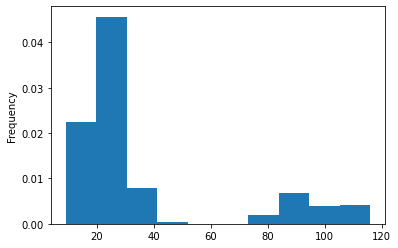

In [60]:
train['Category'].plot(kind="hist", density=True)
#x = train['Category']
#y = train.Category.value_counts
#plt.plot[x,y]
print(train.Category.value_counts(normalize='True').head(2), '\n',train.Category.value_counts(normalize='True').tail(2))

In [61]:
print('Дисбаланс составляет приблизительно 18%')

Дисбаланс составляет приблизительно 18%


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.tokenize import word_tokenize

cv = CountVectorizer()
X = cv.fit_transform(train['sum'])
X


<500000x588356 sparse matrix of type '<class 'numpy.int64'>'
	with 17800589 stored elements in Compressed Sparse Row format>

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [63]:
pip install django==1.11.17

Note: you may need to restart the kernel to use updated packages.


In [64]:
from string import punctuation 
#cv.vocabulary_
res1 = len(list(filter(lambda x: x[0].isdigit(), cv.vocabulary_)))
res2=0
for i in range(len(punctuation)-1):
    res2 += len(list(filter(lambda x: x[0].startswith(punctuation[i]), cv.vocabulary_)))
print("1.",res1, "\n2.", res2)

1. 118616 
2. 423


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [73]:
#import nltk
#nltk.download("stopwords")
import re
from nltk.tokenize import word_tokenize
import nltk
sno = nltk.stem.SnowballStemmer('english')
stopwords = nltk.corpus.stopwords
from string import punctuation
from string import digits
#punct = set(stopwords.words('russian') + list(punctuation) +['«','»', '--', '—'])
sw = set(stopwords.words("russian"))

In [74]:
def tokeniz(text):
    lower_text =  text.lower()
    token_text = word_tokenize(lower_text)
    text_without_digits = [re.sub("[0|1|2|3|4|5|6|7|8|9]","",i) for i in token_text]
    text_without_punct = [re.sub(r'[^\w\s]','', i) for i in text_without_digits]
    #filtered_words = [word for word in text_without_punct if word not in stopwords.words('russian')]
    res = [sno.stem(word) for word in text_without_punct if word not in sw]
    return res#' '.join(res)

In [75]:
%%time
#tokeniz("Куда я пошел")
tokeniz(train['sum'][0])

Wall time: 189 ms


['эбу',
 'renault',
 '',
 'nissan',
 '',
 'dci',
 'delphi',
 '',
 'год',
 'комплект',
 'эбу',
 '',
 'мозги',
 '',
 'компьютер',
 'мотора',
 '',
 'двигателя',
 '',
 'коммутатор',
 '',
 '',
 'электронный',
 'блок',
 'управления',
 'двигателем',
 '',
 'компьютер',
 'мотора',
 '',
 'рено',
 'kangoo',
 '',
 'канго',
 'кангу',
 '',
 '',
 'меган',
 '',
 'сценик',
 '',
 'laguna',
 '',
 'лагуна',
 '',
 '',
 'clio',
 '',
 'клио',
 '',
 '',
 'nissan',
 'micra',
 '',
 'ниссан',
 'микра',
 '',
 'другие',
 'рено',
 'ниссан',
 '',
 'дизель',
 'топливной',
 'аппаратурой',
 'делфи',
 '',
 'бу',
 '',
 'оригинал',
 '',
 'отличное',
 'состояние',
 '',
 'проверенные',
 'гарантией',
 '',
 '',
 '',
 '',
 '',
 '',
 'запчасти',
 'предоставляется',
 'гарантия',
 '',
 'возможна',
 'установка',
 '',
 'подробно',
 '',
 'разделе',
 '',
 'компании',
 '',
 '',
 'дорожим',
 'своей',
 'репутацией',
 'торгуем',
 'легальными',
 'контрактными',
 'запчастями',
 '',
 'детали',
 'наличии',
 'таможенные',
 'документы',
 '',
 

In [76]:
cv = CountVectorizer(tokenizer=tokeniz)

In [77]:
%%time
X = cv.fit_transform(train['sum'][0:100000])
X

Wall time: 2min 20s


<100000x213891 sparse matrix of type '<class 'numpy.int64'>'
	with 3037880 stored elements in Compressed Sparse Row format>

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [68]:
df_row = train#.sample(500000) #если бы брала >500000 изначально, но ноут не тянет
y = df_row['Category'] #target

In [65]:
df = cv.fit_transform(df_row['sum'])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [69]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [71]:
y1_predicted = SGDClassifier().fit(X_train, y_train).predict(X_train)
y2_predicted = SGDClassifier().fit(X_train, y_train).predict(X_test)
print("train/test: ", f"{np.mean(y1_predicted==y_train):.2f};  {np.mean(y2_predicted==y_test):.2f}")

train/test:  0.90;  0.87


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y2_predicted)

0.86895

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [56]:
#data_row = train.sample(100000)
X = tv.fit_transform(df_row['sum'])

In [58]:
#X = data
#y = df_row['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
sgd1 = SGDClassifier().fit(X_train, y_train)
y1_predicted = sgd1.predict(X_train)
y2_predicted = sgd1.predict(X_test)
print("train/test: ", f"{np.mean(y1_predicted==y_train):.2f};  {np.mean(y2_predicted==y_test):.2f}")

accuracy_score(y_test, y2_predicted)

train/test:  0.86;  0.85


0.84649

In [59]:
print("Качество улучшилось приблизительно на 5%.")

Качество улучшилось приблизительно на 5%.


In [11]:
tv2 = TfidfVectorizer(max_df=0.9)
X = tv2.fit_transform(df_row['sum'])

In [17]:
#X = data
#y = df_row['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
sgd2 = SGDClassifier().fit(X_train, y_train) #X изменился
y1_predicted = sgd2.predict(X_train)
y2_predicted = sgd2.predict(X_test)
print("train/test: ", f"{np.mean(y1_predicted==y_train):.2f};  {np.mean(y2_predicted==y_test):.2f}")

accuracy_score(y_test, y2_predicted)

train/test:  0.86;  0.85


0.84653

In [18]:
print("Качество c max_df повысилось на доли процента.")

Качество c max_df повысилось на доли процента.


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [63]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=30000)
#data_row = train.sample(100000)
df1 = hv.transform(df_row['sum'])

In [64]:
X = df1
#y = df_row['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
sgd3 = SGDClassifier().fit(X_train, y_train)
y1_predicted = sgd3.predict(X_train)
y2_predicted = sgd3.predict(X_test)
print("train/test: ", f"{np.mean(y1_predicted==y_train):.2f};  {np.mean(y2_predicted==y_test):.2f}")

accuracy_score(y_test, y2_predicted)

train/test:  0.83;  0.82


0.82073

In [ ]:
print("Самый высокий результат показал второй слуйчай второго подхода с TfidfVectorizer(max_df=0.9)")

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [26]:
import csv

In [19]:
test = pd.read_csv('test.csv')

In [25]:
test['sum'] = test['title'].astype(str) +" "+ test['description'].astype(str)
X_train = tv2.fit_transform(train['sum'])
y_train = train['Category']
sgd2 = SGDClassifier().fit(X_train, y_train)

In [23]:
X_test = tv2.transform(test['sum'])

In [24]:
y_predicted = sgd2.predict(X_test)

In [42]:
y = test['itemid'].astype(str) + ',' + y_predicted.astype(str)

In [48]:
title = "Id,Category"
with open('y_predicted4.csv', mode="w") as csv_file: 
    writer = csv.writer(csv_file,  delimiter = "\n") 
    writer.writerow(y)

In [49]:
check = pd.read_csv('y_predicted4.csv', nrows=10)
check.head()

,1778449823,27
0,1677656962,27
1,1758182804,32
2,1689811299,10
3,1804706240,30
4,1283739820,32


In [ ]:
#в блокноте добавила название и загрузила на kaggle